In [19]:
from benchmark import compute_suggestions
from benchmark import eval_recouvrement
from script.preprocess_data import init_dataset
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
url_dataset = "https://minio.lab.sspcloud.fr/shz42c/hackathon9001Z/EEC_hackathon.csv"
url_stromae = "https://stromae-9001z.kub.sspcloud.fr/questionnaire/90-01Z/unite-enquetee/90-01Z_01"
url_cip = "https://cip-9001z.kub.sspcloud.fr"
url_melauto ="https://melauto-9001z.kub.sspcloud.fr"
    

In [3]:
suggestions = compute_suggestions(url_dataset, url_stromae, url_cip, url_melauto)

Number of unique occupations (men) : 4806
Number of unique occupations (women) : 4672
2022-08-29 10:53:02.227109 - Process Stromae - Men
4487
2022-08-29 10:57:05.686587 - Process Stromae - Women


Process ForkPoolWorker-39:
Traceback (most recent call last):
  File "/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/home/coder/work/Benchmark/script/stromae.py", line 98, in _worker_init
    initialization_driver(url_stromae, is_global, women)
  File "/home/coder/work/Benchmark/script/stromae.py", line 65, in initialization_driver
    driver.find_element(By.CSS_SELECTOR, "#input-label-l5smdkey-1 > p").click()
  File "/home/coder/local/bin/conda/envs/basesspcloud/lib/python3.10/site-packages/selenium/webdriver/remote/webdriver.py", line 855, in find_element
    return self.execute(Command.FIND_ELEME

4349
2022-08-29 11:00:46.492552 - Process Melauto - Men
4263
2022-08-29 11:00:52.949081 - Process Melauto - Women
4152
2022-08-29 11:00:59.669345 - Process CIP - Men
4778
2022-08-29 11:03:43.417693 - Process CIP - Women
4651


In [4]:
data = init_dataset(url_dataset)
data.insert(loc=0,column="obs_id",value=data.index)

In [5]:
evaluation = eval_recouvrement(data,suggestions)

In [6]:
evaluation

{'M':                    label  total  melauto  stromae   cip
 0  Profession principale   5529     5449     4063  5333
 1  Profession secondaire    251      249      179   242
 2  Profession antérieure   1605     1573     1180  1535
 3     Profession du père    613      603      436   592,
 'F':                    label  total  melauto  stromae   cip
 0  Profession principale   5571     5521     4010  5486
 1  Profession secondaire    263      261      184   257
 2  Profession antérieure   1925     1917     1425  1909
 3  Profession de la mère    519      518      354   514}

In [7]:
type_prof = [
    {"id":"PCLCA","label":"Profession principale","sex":None},
    {"id":"PCLCA2J","label":"Profession secondaire","sex":None},
    {"id":"APCLCA","label":"Profession antérieure","sex":None},
    {"id":"FPCLCA","label":"Profession du père","sex":"M"},
    {"id":"MPCLCA","label":"Profession de la mère","sex":"F"}
]


In [8]:
type_sex = [
    {"id":"M", "key_EEC":"1","label":"Homme"},
    {"id":"F", "key_EEC":"2","label":"Femme"}
]

In [9]:
def get_rank(text: str, suggestions: list[str]):
    try:
        return suggestions.index(text)+1
    except:
        return 0

In [10]:
data

,obs_id,TRIM,SEXE,ACTEU,NBEMP,AAC,FPROF,FPROFPREC,MPROF,MPROFPREC,...,PROFM_PUBFIN,PROFM_CPF,PROFM_CPFR,PROFM_CPFFIN,PROFM_TAILLE,PROFM_TAILLER,PROFM_TAILLEFIN,PROFM_PCSRF,MPCLCANBECHO,MPCLCALIBELLEMAX
0,0,1,1,3,,1,,,,,...,,,,,,,,,,
1,1,1,2,3,,1,,,,,...,,,,,,,,,,
2,2,1,2,1,1,,,,,,...,,,,,,,,,,
3,3,1,1,1,1,,,,,,...,,,,,,,,,,
4,4,1,1,1,1,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88522,88522,4,2,1,1,,,,1,,...,9,9,,9,,,9,52B2,,
88523,88523,4,2,3,,2,,,,,...,,,,,,,,,,
88524,88524,4,1,3,,1,1,,4,2,...,,,,,,,,,,
88525,88525,4,1,1,1,,1,,1,,...,9,9,,9,,,9,43D2,,


In [11]:
data_prof = pd.DataFrame()

for s in type_sex:
    for t in type_prof:
        total = None
        id_prof = t["id"]
        
        if t["sex"] is None:
            data_sel = data.loc[(~data[id_prof].isna()) & (data[id_prof]!="") & (data[id_prof]!="999") & (data["SEXE"]==s["key_EEC"]),]
        elif t["sex"]==s["id"]:
            data_sel = data.loc[(~data[id_prof].isna()) & (data[id_prof]!="") & (data[id_prof]!="999"),]
        else:
            data_sel =  pd.DataFrame(data={"text_input":[],"text_choice":[],"obs_id":[]})
        data_sel = data_sel.rename(columns={(id_prof+"LIBELLEMAX"):"text_input",id_prof:"text_choice"})
        data_sel = data_sel[["text_input","text_choice","obs_id"]]
        data_sel.insert(loc=0,column="sex_prof_label",value=[s["label"]]*data_sel.shape[0])
        data_sel.insert(loc=0,column="sex_prof_id",value=[s["id"]]*data_sel.shape[0])
        data_sel.insert(loc=0,column="type_prof_label",value=[t["label"]]*data_sel.shape[0])
        data_sel.insert(loc=0,column="type_prof_id",value=[t["id"]]*data_sel.shape[0])
        data_sel.insert(loc=0,column="rank_melauto",value=[get_rank(y,suggestions[s["id"]]["melauto"][x]) for x,y in zip(data_sel.text_input,data_sel.text_choice)])
        data_sel.insert(loc=0,column="rank_cip",value=[get_rank(y,suggestions[s["id"]]["cip"][x]) for x,y in zip(data_sel.text_input,data_sel.text_choice)])
        data_sel.insert(loc=0,column="rank_stromae",value=[get_rank(y,suggestions[s["id"]]["stromae"][x]) for x,y in zip(data_sel.text_input,data_sel.text_choice)])
        data_prof = pd.concat([data_prof,data_sel],ignore_index=True)

data_prof.rank_melauto = [int(x) for x in data_prof.rank_melauto]
data_prof.rank_cip = [int(x) for x in data_prof.rank_cip]
data_prof.rank_stromae = [int(x) for x in data_prof.rank_stromae]
data_prof.obs_id = [int(x) for x in data_prof.obs_id]
data_prof = data_prof[["obs_id","type_prof_id","type_prof_label","sex_prof_id","text_input","text_choice","rank_melauto","rank_cip","rank_stromae"]]

In [37]:
os.mkdir("./data")

In [39]:
data_prof.to_csv(r"./data/benchmark_eec.csv",index=False,encoding="utf-8")

In [41]:
data_prof_2 = pd.read_csv(r"./data/benchmark_eec.csv",encoding="utf-8")
data_prof_2

,obs_id,type_prof_id,type_prof_label,sex_prof_id,text_input,text_choice,rank_melauto,rank_cip,rank_stromae
0,3,PCLCA,Profession principale,M,Dessinateur in,Dessinateur projeteur industriel,2,12,6
1,4,PCLCA,Profession principale,M,contrôleur qualité,Contrôleur qualité de l'industrie,1,1,4
2,5,PCLCA,Profession principale,M,tech,Technicien d'assistance en informatique,10,161,0
3,13,PCLCA,Profession principale,M,VENDEUR,Vendeur d'articles de sport,10,71,16
4,22,PCLCA,Profession principale,M,apprenti macon,Apprenti maçon,1,1,1
...,...,...,...,...,...,...,...,...,...
16271,87958,MPCLCA,Profession de la mère,F,Secré,Secrétaire administrative de l'État,4,24,10
16272,88208,MPCLCA,Profession de la mère,F,agri,Agricultrice céréalière,2,10,6
16273,88219,MPCLCA,Profession de la mère,F,assistante ma,Assistante maternelle agréée,4,55,9
16274,88384,MPCLCA,Profession de la mère,F,ASS,Assistante maternelle agréée,67,92,0


In [25]:
def eval_recouvrement_bis(data: pd.DataFrame) -> dict[str, pd.DataFrame]:
    output = {}
    for s in type_sex:
        list_dict_obs = []
       
        for t in type_prof:
            total = None
            id_prof = t["id"]
            
            if t["sex"] is None or t["sex"]==s["id"]:
                data_sel = data.loc[(data["type_prof_id"]==t["id"]) & (data["sex_prof_id"]==s["id"])]
                total = data_sel.shape[0]
                obs = {"label":t["label"], "total": total}
                for name_tool in [x[5:] for x in list(data_prof.columns) if re.match(string=x,pattern="rank_") is not None]:
                    obs[name_tool] = data_sel.loc[data_sel["rank_"+name_tool]>0,].shape[0]
                list_dict_obs.append(obs)
        output[s["id"]] = pd.DataFrame.from_records(list_dict_obs)
    return output

In [26]:
eval_recouvrement_bis(data_prof)

{'M':                    label  total  melauto   cip  stromae
 0  Profession principale   5529     5449  5333     4063
 1  Profession secondaire    251      249   242      179
 2  Profession antérieure   1605     1573  1535     1180
 3     Profession du père    613      603   592      436,
 'F':                    label  total  melauto   cip  stromae
 0  Profession principale   5571     5521  5486     4010
 1  Profession secondaire    263      261   257      184
 2  Profession antérieure   1925     1917  1909     1425
 3  Profession de la mère    519      518   514      354}

In [34]:
1180 /1605                           

0.735202492211838

In [26]:
for x,y in suggestions["M"]["stromae"].items():
    if not(y):
        print(x)


internet
qualit
Accompagnement éducatif de personnes handicapées psychiques
ingénieur syste
Pompier d'aéroport Aéroport de Paris Orly
ingenieur qualite
calorifu
Chef de cu
chauffeur
ingénieur informa
technicien de mai
SERRURIER
alternan
bâtiment
négociateur
Technicien audio
ingenieur in
lois
nav
vendeur el
espace
Mecanicien
Chauffeur poids l
operateur en met
conducteur
vendeur i
concepteur développeur confirmé
ascen
RESPNSABLE D'agence
technicien hygiène et désinfection
age
Jury pour CAP à l'AFPA
paysa
Technicien de maintenance ind
CONSULTANT
directeur d'ass
je n ai pas trouvé
prepa
attaché
mecani
agent d'accomp
technicien ind
Assistant
assistant fa
presta
EBENISTE
cuisine
charges d affaires
AGENT
apprenti macon
chef
auto-école
chir
directeur conseil en
petit compagnon Maçon
chauffeur t
plaquiste
Consult
Conducteur Autoplatine
Commercial tourisme
REGULATE
apprenti en plasturgie
Directeur export
Ingénieur am
ingénieur de re
agent territo
peint
agent de maitri
Rayonniste
statis
Responsa

In [24]:
data_prof.loc[data_prof["rank_stromae"]==0,]

,obs_id,type_prof_id,type_prof_label,sex_prof_id,text_input,text_choice,rank_melauto,rank_cip,rank_stromae
2,5,PCLCA,Profession principale,M,tech,Technicien d'assistance en informatique,10,161,0
4,22,PCLCA,Profession principale,M,apprenti macon,Apprenti maçon,1,1,0
5,29,PCLCA,Profession principale,M,ingénieur,Ingénieur hospitalier,76,38,0
7,69,PCLCA,Profession principale,M,,Paysagiste,0,0,0
11,91,PCLCA,Profession principale,M,informa,Informaticien de développement,4,13,0
...,...,...,...,...,...,...,...,...,...
16265,87646,MPCLCA,Profession de la mère,F,ambulan,Ambulancière,1,1,0
16268,87929,MPCLCA,Profession de la mère,F,COUTU,Couturière de l'industrie de l'habillement,3,8,0
16269,87931,MPCLCA,Profession de la mère,F,infogr,Infographiste,1,2,0
16270,87948,MPCLCA,Profession de la mère,F,responsable,Responsable propreté,142,16,0


In [42]:
concat_men

,type_prof_id,type_prof_label,text_input,text_choice,rank_melauto,rank_cip,rank_stromae
0,PCLCA,Profession principale,Dessinateur in,Dessinateur projeteur industriel,2,12,6
1,PCLCA,Profession principale,contrôleur qualité,Contrôleur qualité de l'industrie,1,1,4
2,PCLCA,Profession principale,tech,Technicien d'assistance en informatique,10,161,0
3,PCLCA,Profession principale,VENDEUR,Vendeur d'articles de sport,10,71,0
4,PCLCA,Profession principale,apprenti macon,Apprenti maçon,1,1,1
...,...,...,...,...,...,...,...
7993,FPCLCA,Profession du père,prepar,Préparateur automobile,1,3,4
7994,FPCLCA,Profession du père,Mécani,Mécanicien d'entretien automobile,8,43,0
7995,FPCLCA,Profession du père,AGENT,Agent administratif des collectivités territor...,15,251,15
7996,FPCLCA,Profession du père,BATIMENT,Technicien du bâtiment,24,9,0


In [19]:
rank_melauto = list(data_prof.loc[data_prof["rank_melauto"]>0,"rank_melauto"])
rank_cip = list(data_prof.loc[data_prof["rank_cip"]>0,"rank_cip"])
rank_stromae = list(data_prof.loc[data_prof["rank_stromae"]>0,"rank_stromae"])

In [20]:
# the histogram of the data
rank_choice = rank_melauto
def plot_single_hist(rank_choice):
    n, bins, patches = plt.hist(rank_choice, [x for x in range(min(rank_choice),max(rank_choice)+1)], density=True, facecolor='g', alpha=0.75)


    plt.xlabel('Smarts')
    plt.ylabel('Probability')
    plt.title('Histogram of IQ')
    plt.xlim(0, 30)
    plt.ylim(0, 0.5)
    plt.grid(True)
    plt.show()

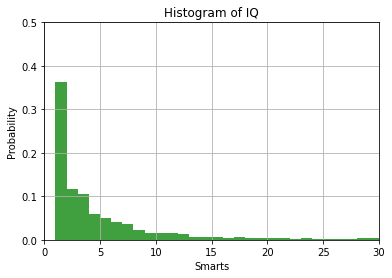

In [21]:
plot_single_hist(rank_melauto)

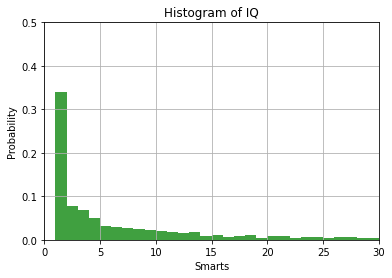

In [22]:
plot_single_hist(rank_cip)

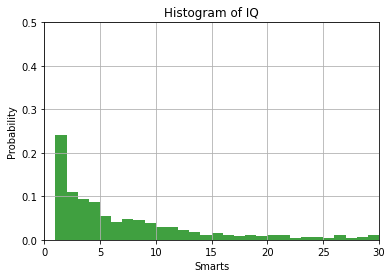

In [23]:
plot_single_hist(rank_stromae)

In [33]:
concat_men

,text_input,text_choice,found_melauto
0,vendeur fromagerie,Vendeur en fromagerie,1
1,technicien,Technicien en entretien industriel,42
2,frai,Ajusteur fraiseur,4
3,menuisier,Menuisier du bâtiment,3
4,gardien,Gardien de propriété,16
...,...,...,...
7993,clima,Climaticien,1
7994,app,Apprenti boucher,3
7995,soudeur,Soudeur de l'industrie des métaux,3
7996,AGRICULTEUR,Agriculteur en arboriculture,1
